## Task 
Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

### Dataset 
Twitter Sentiment Analysis

### Overveiw 
This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

#### 1.Importing Necessary libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [57]:
cols=['ID', 'Topic', 'Sentiment', 'Text']
train = pd.read_csv('twitter_training.csv', names = cols)

#### 2.Informatioin about Dataframe

In [58]:
train.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [59]:
train.shape

(75682, 4)

In [60]:
train.info

<bound method DataFrame.info of          ID                Topic   Sentiment  \
0      2401          Borderlands    Positive   
1      2401          Borderlands    Positive   
2      2401          Borderlands    Positive   
3      2401          Borderlands    Positive   
4      2401          Borderlands    Positive   
...     ...                  ...         ...   
75677  4891  GrandTheftAuto(GTA)  Irrelevant   
75678  4359                CS-GO  Irrelevant   
75679  2652          Borderlands    Positive   
75680  8069            Microsoft    Positive   
75681  6960      johnson&johnson     Neutral   

                                                    Text  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                  

In [61]:
train.describe(include=object)

,Topic,Sentiment,Text
count,75682,75682,74996
unique,32,4,69972
top,TomClancysRainbowSix,Negative,
freq,2435,22808,172


In [62]:
train['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

#### 3.Checking for null/missing values

In [63]:
train.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [64]:
train.dropna(inplace=True)

#### 4.Checking for duplicate values

In [65]:
train.duplicated().sum()

np.int64(2858)

In [66]:
train.drop_duplicates(inplace=True)
train.duplicated().sum()

np.int64(0)

#### 5.Visualization of count different topics

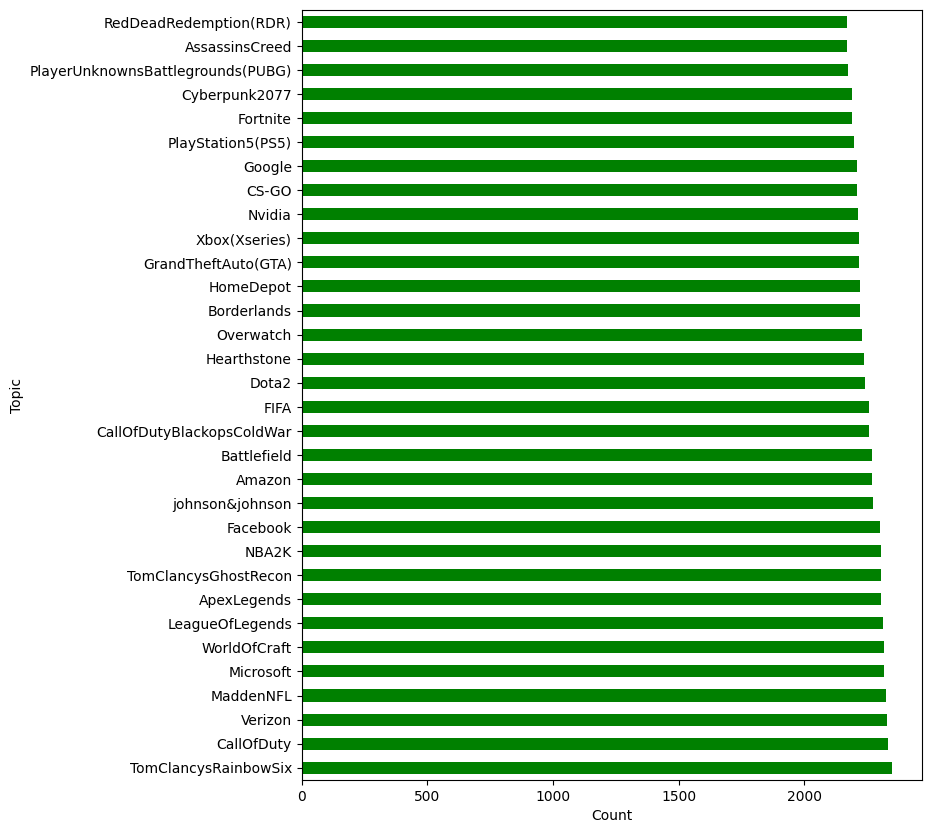

In [67]:
plt.figure(figsize=(8,10))
train['Topic'].value_counts().plot(kind='barh', color='g')
plt.xlabel("Count")
plt.show()

#### 6.Sentiment Distribution

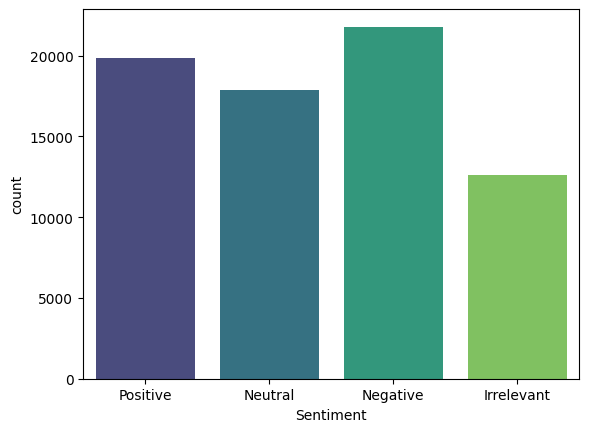

In [68]:
sns.countplot(x='Sentiment',hue = 'Sentiment', data=train, palette='viridis')
plt.show()

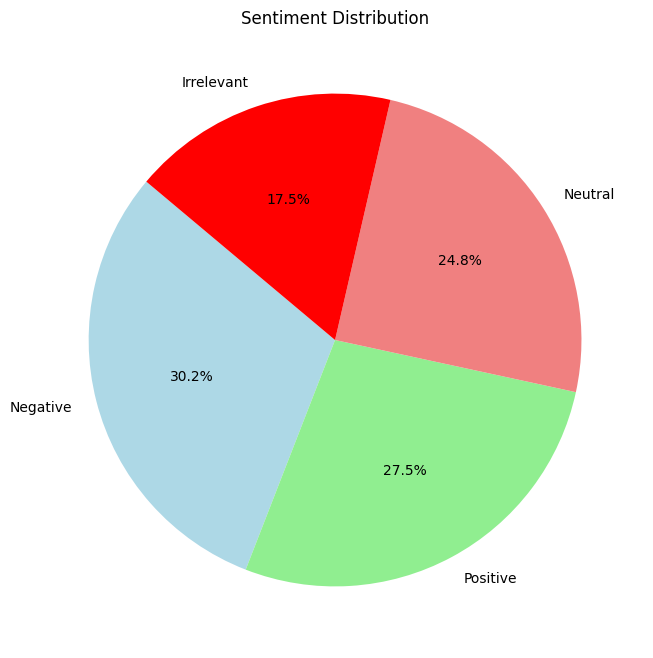

In [69]:
# Calculate the count of each sentiment
sentiment_counts = train['Sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral','red'])

plt.title('Sentiment Distribution')
plt.show()

Observation:
            Most topic has negative sentiment.

In [70]:
train

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
75670,7516,LeagueOfLegends,Neutral,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...
75671,5708,HomeDepot,Positive,Thank you to Matching funds Home Depot RW paym...
75673,2165,CallOfDuty,Neutral,Late night stream with the boys! Come watch so...
75677,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...


#### 7. Sentiment Distribution topic wise

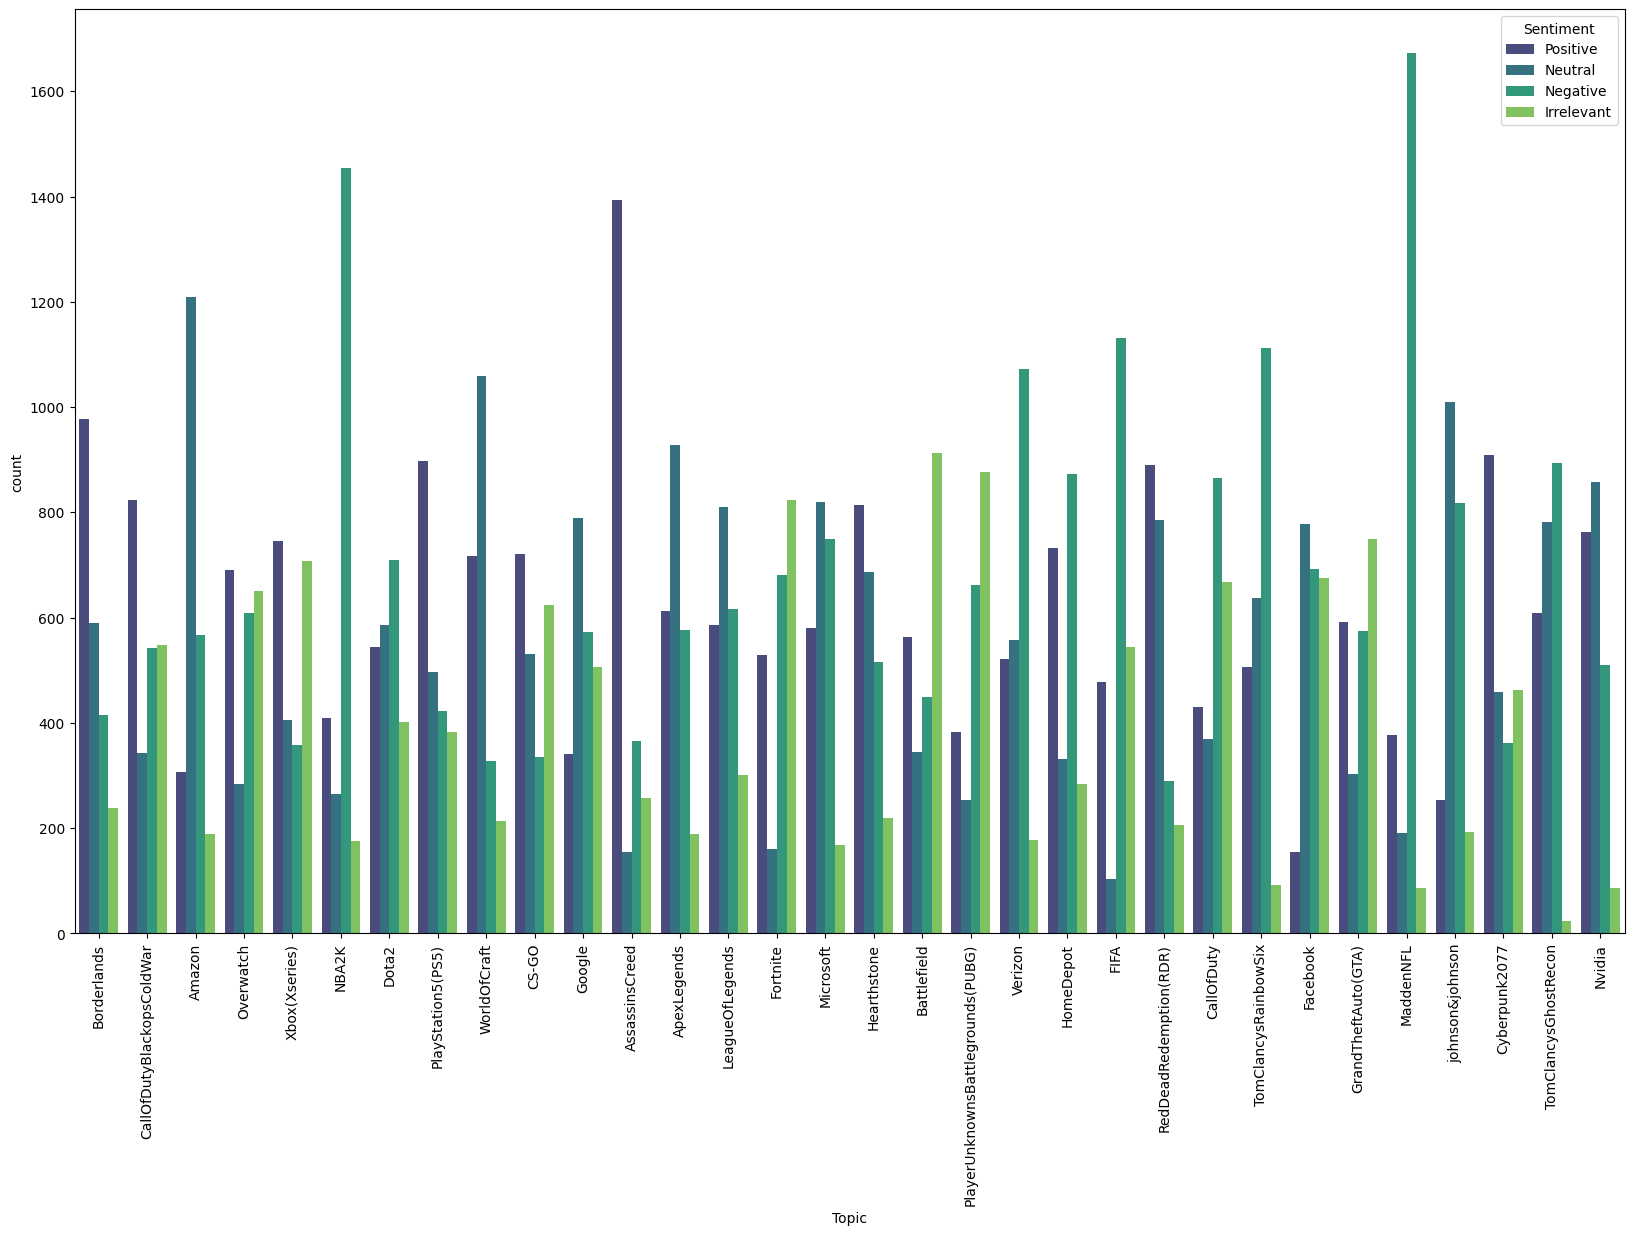

In [71]:
plt.figure(figsize=(20,12))
sns.countplot(x='Topic',data=train,palette='viridis',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

In [72]:
## Group by Topic and Sentiment
topic_wise_sentiment = train.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Topics
topic_counts = train['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

#### 8. Top 5 Topics with Negative Sentiments


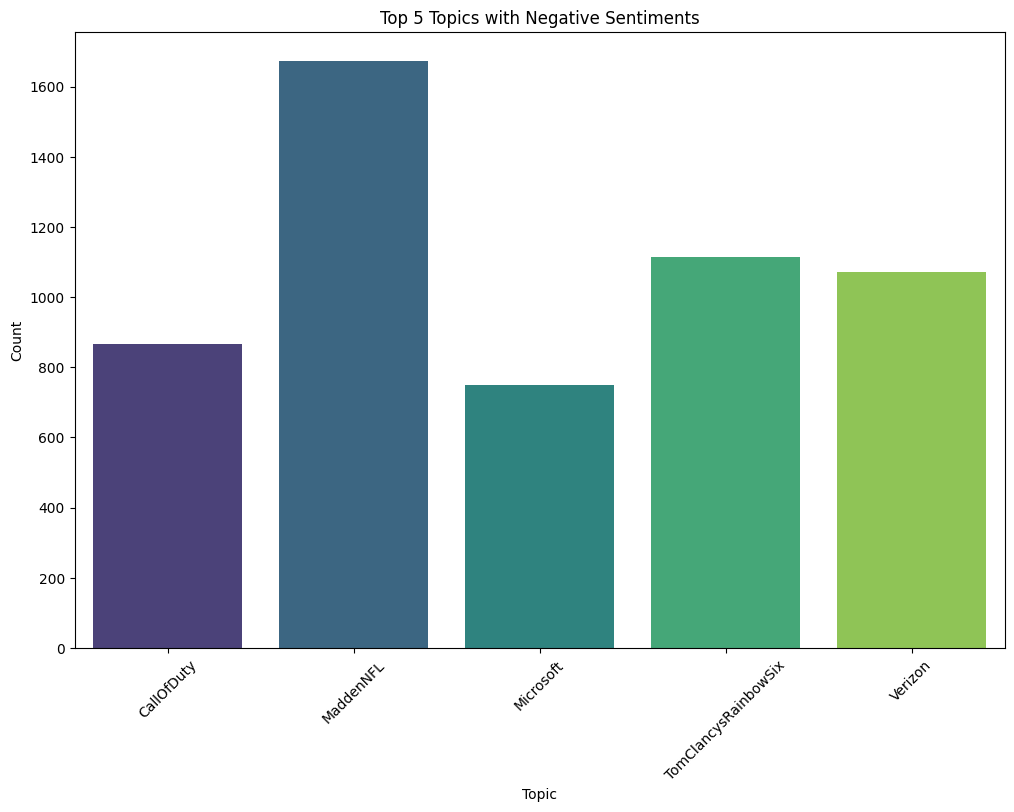

In [73]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', hue='Topic', palette='viridis', legend=False)
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### 9. Top 5 Topics with positive sentiment

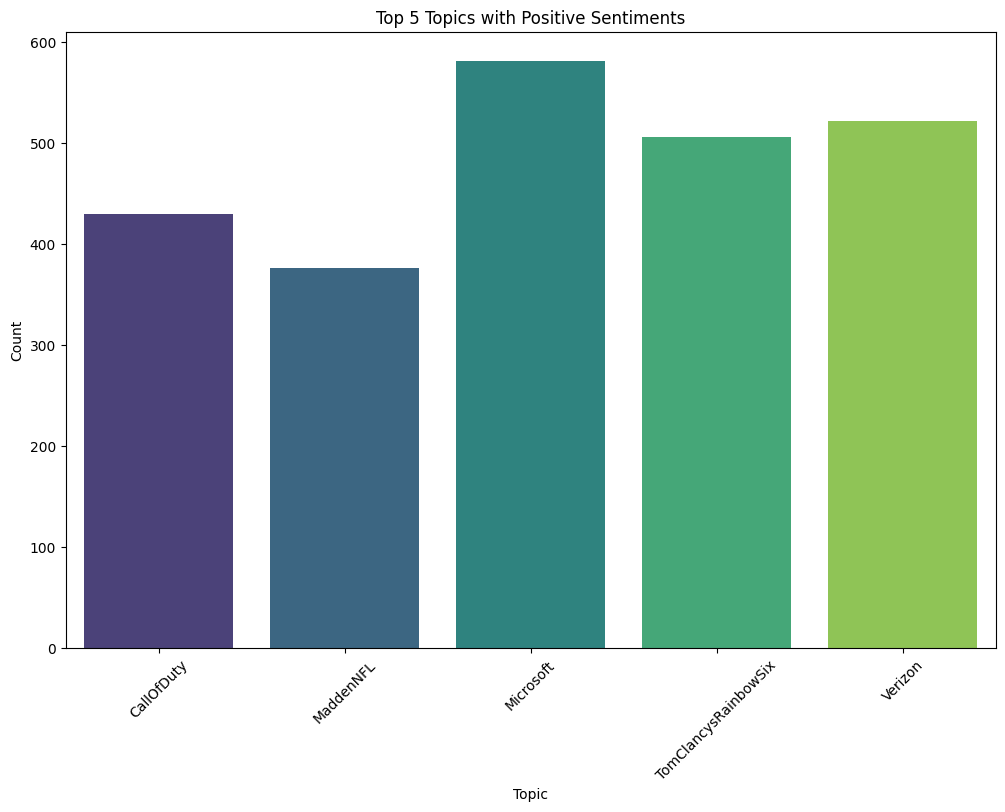

In [74]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', hue = 'Topic', palette='viridis', legend=False)
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### 10. Top 5 topics with Neutral Sentiments

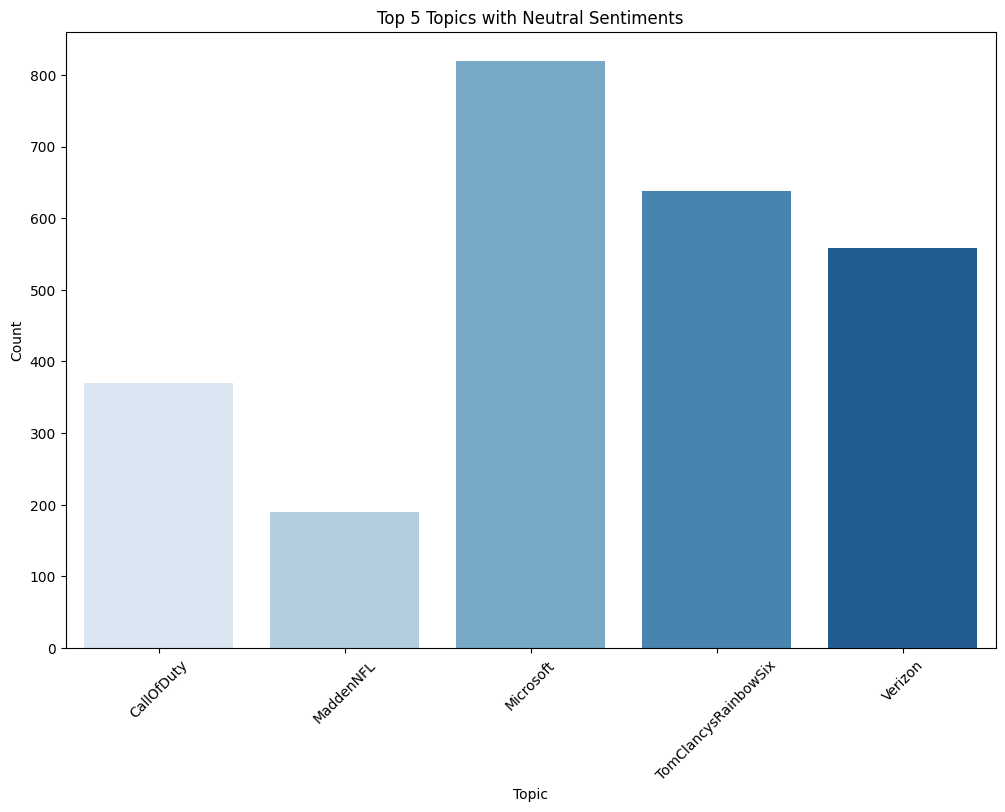

In [75]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count',hue = 'Topic', palette='Blues', legend = False)
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### 11. Topic 5 topics with Irrelevant Sentiments

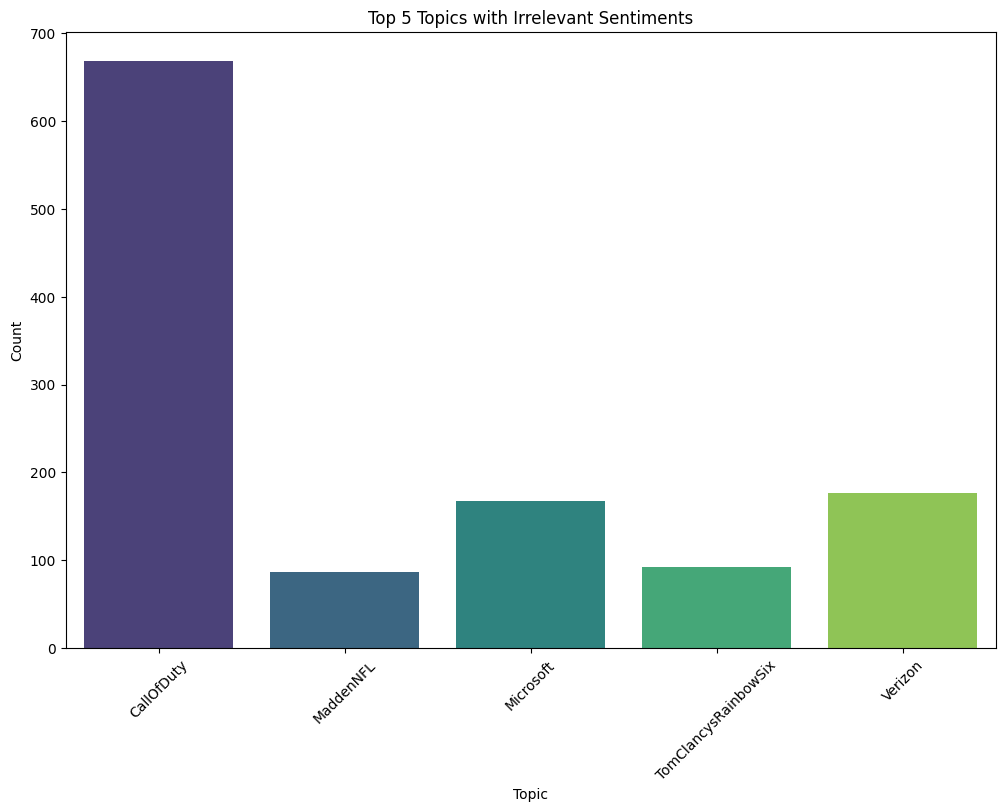

In [76]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', hue = 'Topic', palette='viridis', legend = False)
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### 12. Sentiment Distribution in Google

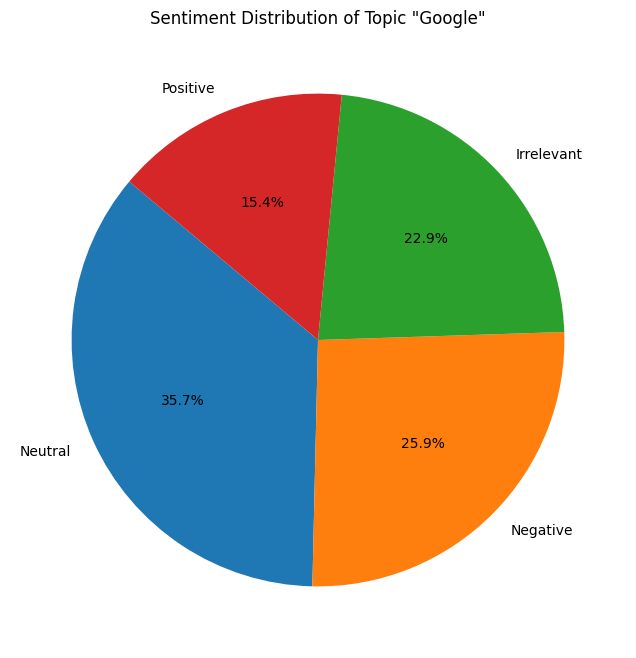

In [77]:
# Filter the dataset to include only entries related to the topic 'Google'
google_data = train[train['Topic'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

#### 13. Sentiment Distribution in Microsoft

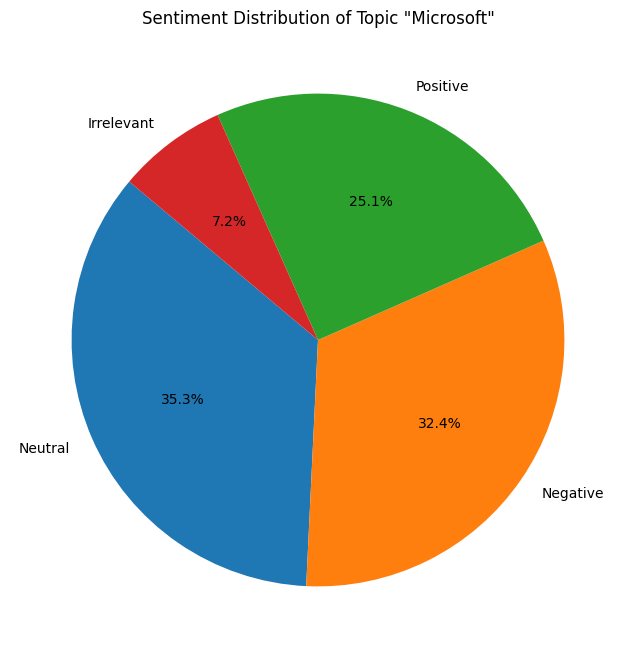

In [78]:
# Filter the dataset to include only entries related to the topic 'Microsoft'
ms_data = train[train['Topic'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = ms_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

In [79]:
train['msg_len'] = train['Text'].apply(len)

train

,ID,Topic,Sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
75670,7516,LeagueOfLegends,Neutral,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...,109
75671,5708,HomeDepot,Positive,Thank you to Matching funds Home Depot RW paym...,169
75673,2165,CallOfDuty,Neutral,Late night stream with the boys! Come watch so...,197
75677,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,281


#### 14.Plot of message length distribution for training data

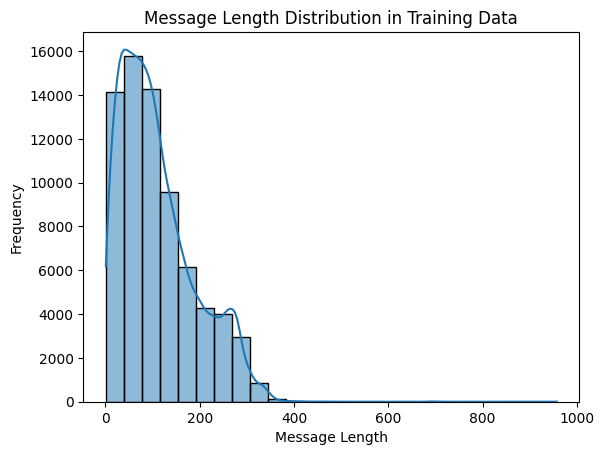

In [80]:

sns.histplot(train['msg_len'], bins=25,kde=True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

#### 15. Plot message length distrbution by sentiment for training data

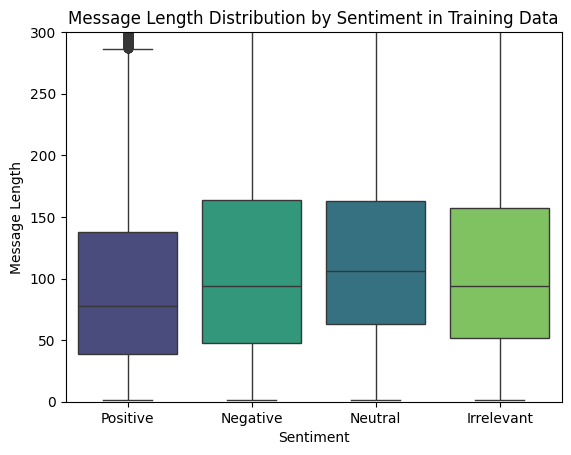

In [81]:
sns.boxplot(data=train, x=train['Sentiment'], y='msg_len',hue = train['Sentiment'], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], legend=False)
plt.title('Message Length Distribution by Sentiment in Training Data')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0,300)
plt.show() 

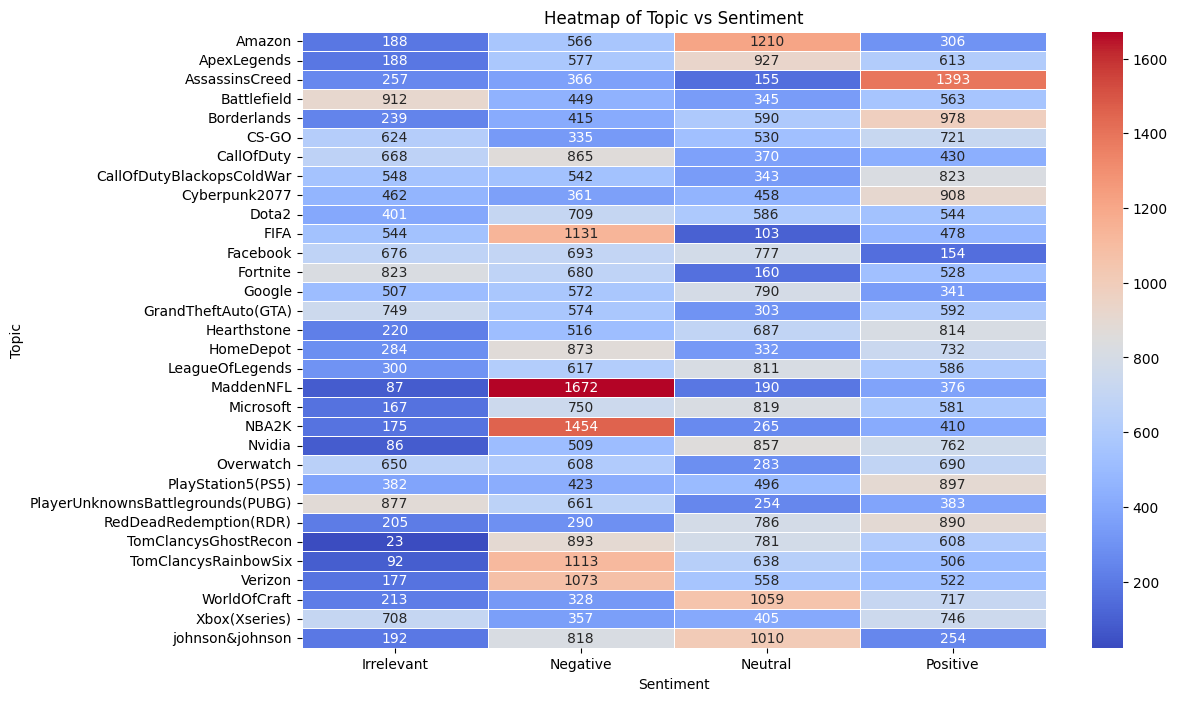

In [82]:
# Create the crosstab
crosstab = pd.crosstab(index=train['Topic'], columns=train['Sentiment'])

# Plot the heatmap
plt.figure(figsize=(12, 8))  
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')

# Show the plot
plt.show()

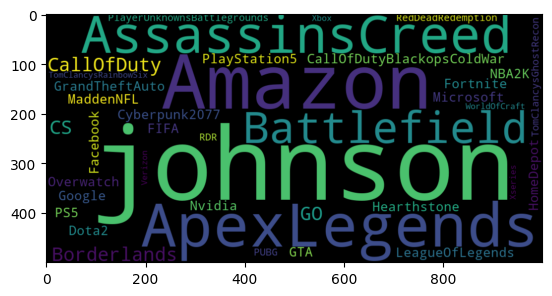

In [83]:
topic_list = ' '.join(crosstab.index)


wc = WordCloud(width=1000, height=500).generate(topic_list)

plt.imshow(wc, interpolation='bilinear')

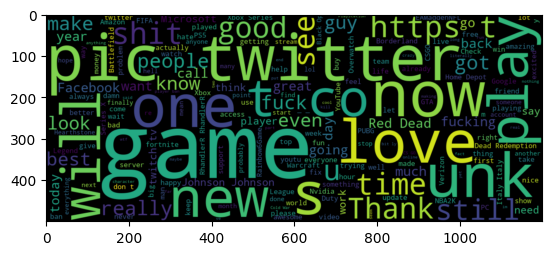

In [84]:
corpus = ' '.join(train['Text'])

wc2 = WordCloud(width=1200, height=500).generate(corpus)

plt.imshow(wc2, interpolation='bilinear')